# outlier handeling using IQR METHOD

In [51]:

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [52]:
data = np.array([23, 25, 22, 27, 21, 24, 26, 100, 23, 28, 22, 29])

# Calculate mean and standard deviation
mean = np.mean(data)
std_dev = np.std(data)

# Set Z-score threshold
z_threshold = 2

# Calculate Z-scores
z_scores = [(x - mean) / std_dev for x in data]

# Identify outliers
outliers = [data[i] for i, z in enumerate(z_scores) if abs(z) > z_threshold]

print("Original Data:", data)
print("Outliers detected using Z-score:", outliers)

Original Data: [ 23  25  22  27  21  24  26 100  23  28  22  29]
Outliers detected using Z-score: [np.int64(100)]


In [53]:
arr=np.array([1,2,3,4,5,6,7,8,9,99])
std_dev=np.std(arr)
mean= np.mean(arr)
max_allowed=2
#  calculating z score for each number in array
z_scores=[]
for i in arr:
    z_scores.append((i-mean)/std_dev)
# print(z_scores)
#  finding outlier 
for i in arr:
    if abs(z_scores[i]>max_allowed):
        print(arr[i])
        break
    


99


In [54]:
df= pd.read_csv('scholarship.csv')

In [55]:
df

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0
...,...,...,...
995,88.7,44,1
996,91.2,65,1
997,48.9,34,0
998,86.2,46,1


In [56]:
df.head()

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0


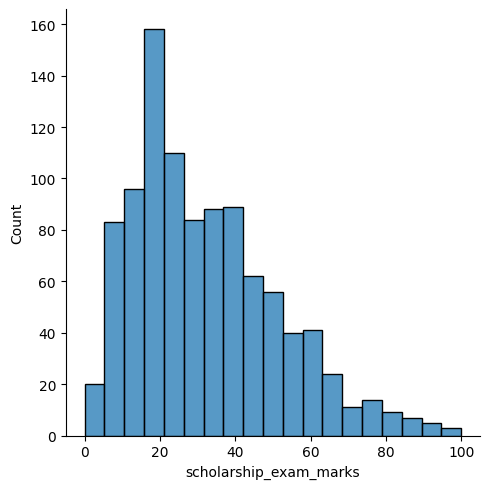

In [57]:
sns.displot(df["scholarship_exam_marks"])   #skewed plot

In [58]:
df["scholarship_exam_marks"].skew()

np.float64(0.8356419499466834)

In [59]:
df["scholarship_exam_marks"].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: scholarship_exam_marks, dtype: float64

<Axes: ylabel='scholarship_exam_marks'>

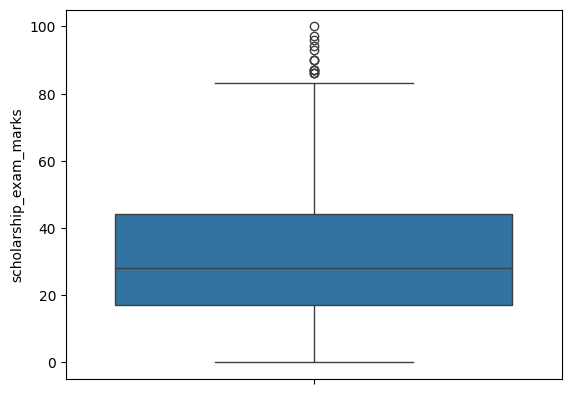

In [60]:
sns.boxplot(df["scholarship_exam_marks"])

In [61]:
df['scholarship_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: scholarship_exam_marks, dtype: float64

In [62]:
Q1= df['scholarship_exam_marks'].quantile(0.25)
Q3=df['scholarship_exam_marks'].quantile(0.75)
print('Q1 = ',Q1,'  Q2 = ',Q3)

Q1 =  17.0   Q2 =  44.0


In [63]:
IQR= Q3-Q1
least_allowed = Q1-1.5*IQR
max_allowed = Q3+1.5*IQR

In [64]:
print('least_allowed value = ',least_allowed)
print('max_allowed value = ',max_allowed)

least_allowed value =  -23.5
max_allowed value =  84.5


In [65]:
# finding the outliers 
for i in df['scholarship_exam_marks']:
    if i<least_allowed or i>max_allowed:
        print(i)

94
86
86
93
90
87
87
87
90
96
87
90
86
97
100


## <font color =7052B8> __1.  Triming :__</font>

In [66]:
result=df[(df['scholarship_exam_marks']<=max_allowed) & (df['scholarship_exam_marks']>=least_allowed)]
result.head()

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0


Text(0.5, 1.0, 'scholarship exam marks boxplot')

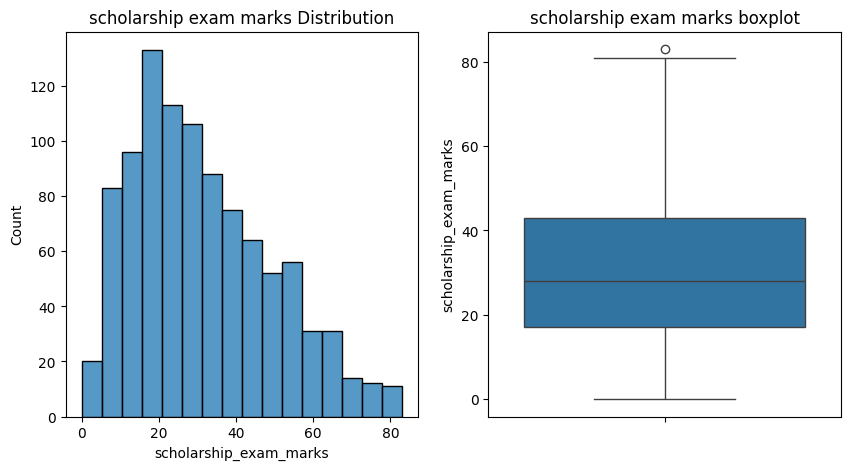

In [67]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(result['scholarship_exam_marks'])
plt.title('scholarship exam marks Distribution')
plt.subplot(1,2,2)
sns.boxplot(result['scholarship_exam_marks'])
plt.title('scholarship exam marks boxplot')

## <font color =7052B8> __2. Capping :__</font>

In [68]:
result=df.copy()
result.head(2)

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1


<Axes: xlabel='scholarship_exam_marks', ylabel='Count'>

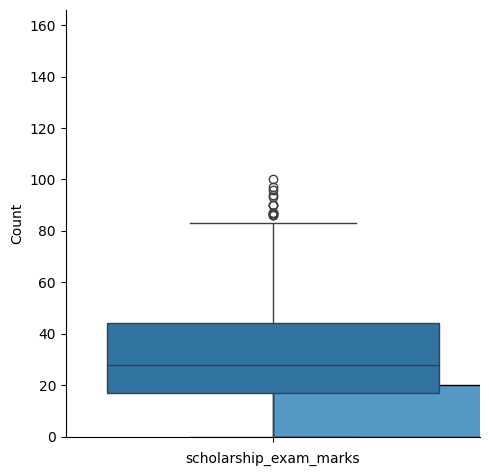

In [69]:
sns.displot(result['scholarship_exam_marks'])
sns.boxplot(result['scholarship_exam_marks'])

In [71]:
df['scholarship_exam_marks']=np.where(df['scholarship_exam_marks']>max_allowed,max_allowed,
                                  np.where(df['scholarship_exam_marks']<least_allowed,least_allowed,df['scholarship_exam_marks']))

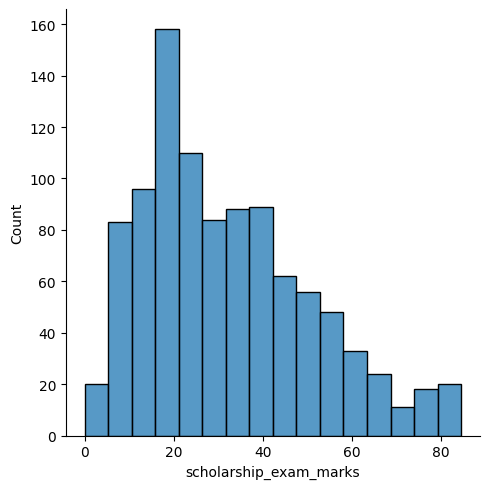

In [76]:
sns.displot(df['scholarship_exam_marks'])
# sns.boxplot(df['scholarship_exam_marks'])